In [1]:
from PIL import Image 
from wordcloud import WordCloud, ImageColorGenerator # Image 로부터 Color 를 생성(Generate)해내는 객체입니다.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline
import pickle as pickle
import pandas as pd
from matplotlib import font_manager, rc
import nltk
from nltk.corpus import stopwords
import konlpy
from konlpy.tag import Twitter
from collections import Counter
from tqdm import tnrange
from tqdm import tqdm

## 저장된 토큰 파일을 가지고 워드클라우드 실행 

In [30]:
position_counter_list = pd.read_pickle('position_counter_list.pkl')
sorted_counter_list = pd.read_pickle('sorted_counter_list.pkl')

In [35]:
#데이터프레임에서의 임의의 id값

image_file_list = ['경영', '홍보', 'it', '디자인', '무역', '영업' ,'서비스' ,'연구개발' ,'생산' ,'교육', '건설', '의료' ,'미디어' ,'전문직']
numbering = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12,13,14]
group_file_list = ['농협', '롯데', '삼성', '한국전력공사', '한화', '현대자동차', 'CJ', 'GS', 'KT', 'LG', 'SK']

numbering2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [33]:
word_cloud_df1 = pd.DataFrame({'image_file' : image_file_list ,"job_num" : numbering, 'job_dict': position_counter_list })

In [74]:
word_cloud_df1.head()

,image_file,job_num,job_dict
0,경영,1,"{'직장': 67, '생계': 4, '꾸리다': 3, '수단': 18, '가치관':..."
1,홍보,2,"{'디지털': 39, '기술': 85, '입다': 4, '데이터': 113, '분석..."
2,it,3,"{'기술': 1021, '농간': 5, '격차': 2, '점점': 60, '벌어지다..."
3,디자인,4,"{'패키지': 11, '디자인': 25, '자부심': 2, '신제품': 1, '담당..."
4,무역,5,"{'적극': 83, '협력': 94, '인재': 90, '봉사활동': 19, '신청..."


In [72]:
word_cloud_df2 = pd.DataFrame({"group_num" : numbering2,'image_file' : group_file_list , 'company_dict' : sorted_counter_list})


In [73]:
word_cloud_df2.head()

,group_num,image_file,company_dict
0,1,농협,"[(농협, 553), (생각, 466), (고객, 448), (통해, 330), (..."
1,2,롯데,"[(고객, 716), (생각, 605), (경험, 586), (업무, 562), (..."
2,3,삼성,"[(생각, 2341), (통해, 1553), (위해, 1424), (기술, 1290..."
3,4,한국전력공사,"[(생각, 1106), (위해, 1003), (통해, 852), (업무, 725),..."
4,5,한화,"[(생각, 462), (통해, 399), (위해, 394), (한화, 344), (..."


# 직무별 워드클라우드 만들기 

버전을 선택하세요(1번 그룹별, 2번 직무별 ) : 2
불러올 마스크 이미지 파일 이름을 입력해주세요 (파일을 미리 준비해주세요) : 교육1.png
저장할 파일 이름을 입력해주세요 :워드클라우드_교육
경영 : 1 
홍보 : 2 
it : 3 
디자인 : 4 
무역 : 5 
영업 : 6 
서비스 : 7 
연구개발 : 8 
생산 : 9 
교육 : 10 
건설 : 11 
의료 : 12 
미디어 : 13 
전문직 : 14 
빈도사전의 번호를 선택해주세요 : 10


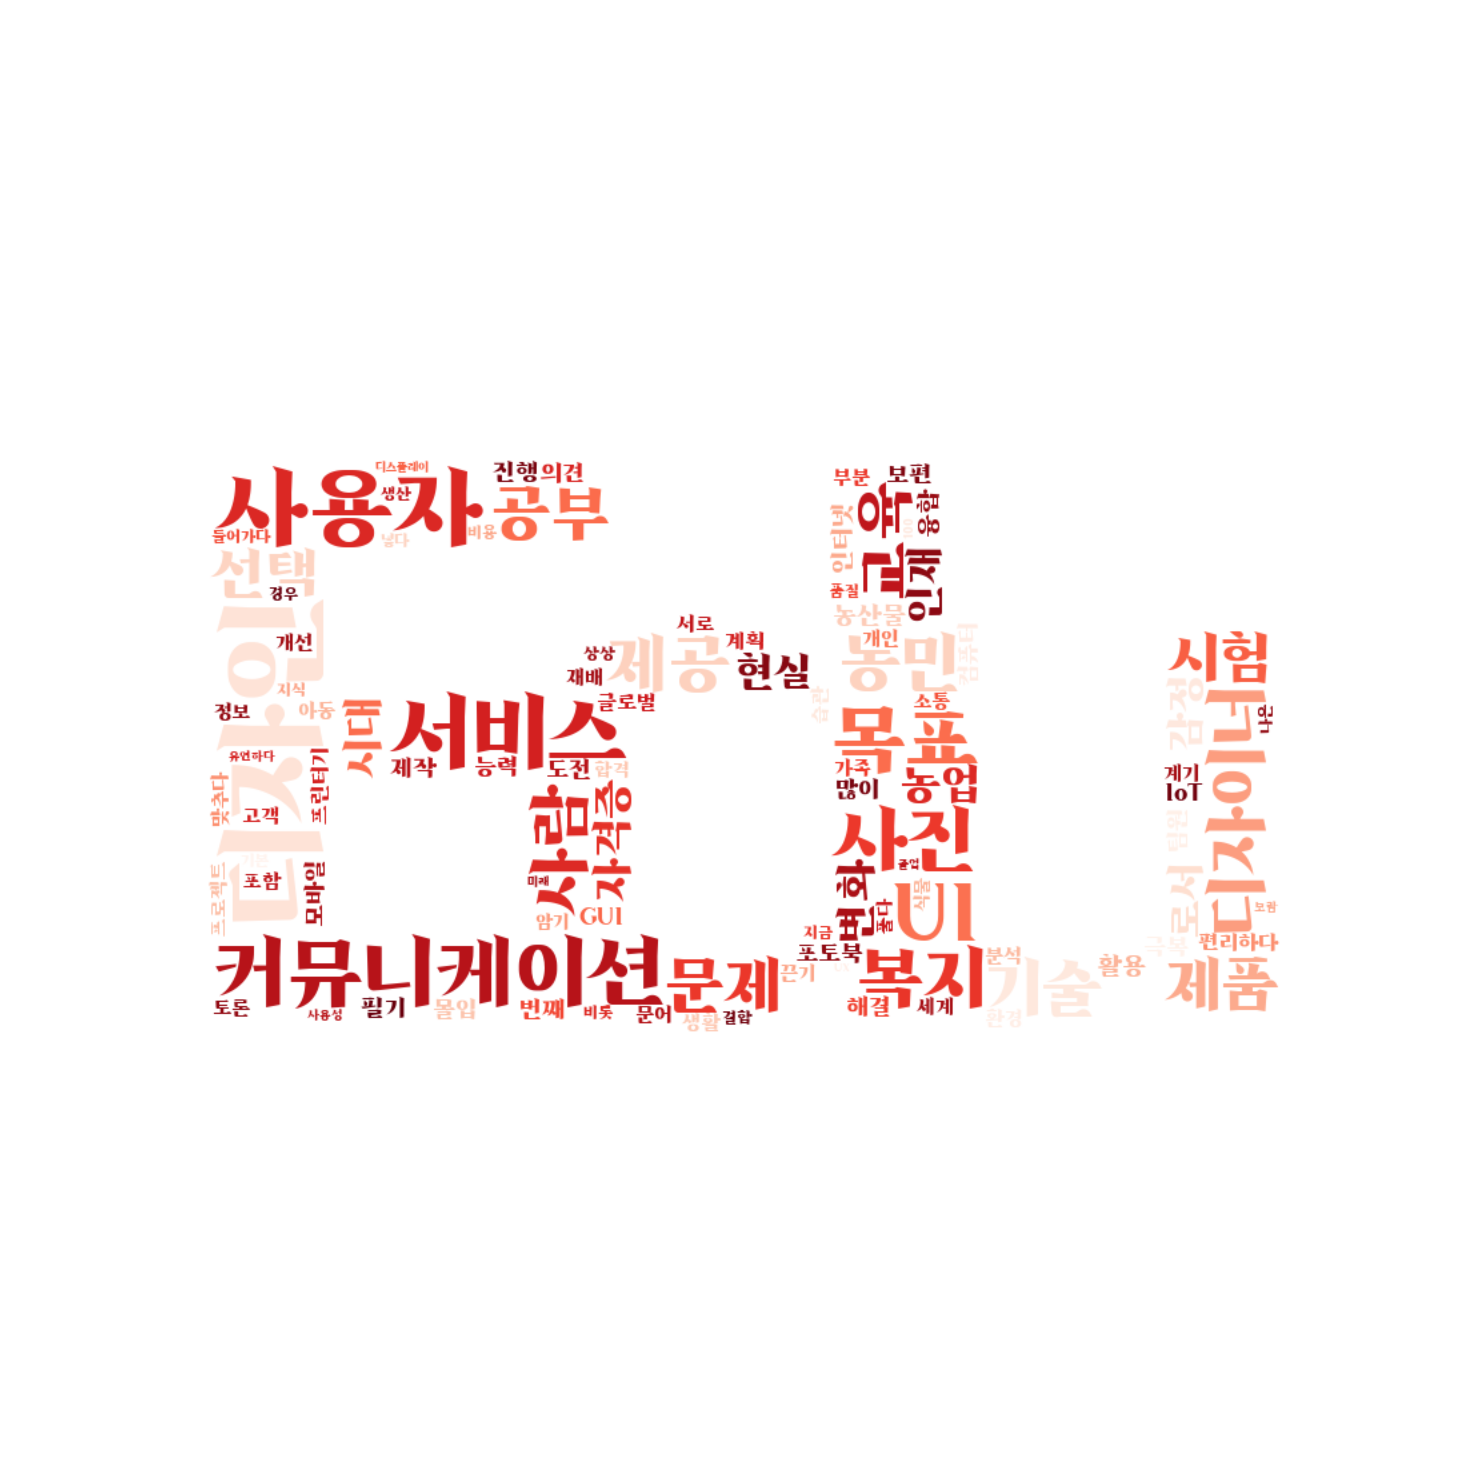

In [70]:
version_choice = int(input('버전을 선택하세요(1번 그룹별, 2번 직무별 ) : '))

if (version_choice ==1) : 
    mask_file_name = input('불러올 마스크 이미지 파일 이름을 입력해주세요 (파일을 미리 준비해주세요) : ')
    save_file_name = input('저장할 파일 이름을 입력해주세요 :')
    for file, num in zip(word_cloud_df2['image_file'],word_cloud_df2['group_num'] ):
        print('{} : {} '.format(file,num))
    tokend = int(input('빈도사전의 번호를 선택해주세요 : '))
    
    company_coloring = np.array(Image.open(mask_file_name))
    image_colors = ImageColorGenerator(company_coloring)
    
    word_cloud = WordCloud(font_path="HSBombaram3.0_Regular.ttf",
                       width=1000, height=1000,  
                       max_words=100,
                       min_font_size = 5,
                       mask=company_coloring, 
                       contour_color='white',
                       contour_width=0.01,
                       background_color='white', 
                       max_font_size=50, 
                      ).generate_from_frequencies(dict(sorted_counter_list[int(tokend) -1 ]))
    
    plt.figure(figsize=(10,10))
    set_matplotlib_formats('retina')
    plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('{}_group'.format(save_file_name))

    
else:   
    mask_file_name = input('불러올 마스크 이미지 파일 이름을 입력해주세요 (파일을 미리 준비해주세요) : ')
    save_file_name = input('저장할 파일 이름을 입력해주세요 :')
    for file, num in zip(word_cloud_df['image_file'],word_cloud_df['job_num'] ):
        print('{} : {} '.format(file,num))
    tokend = input('빈도사전의 번호를 선택해주세요 : ')

    company_coloring = np.array(Image.open(mask_file_name))
    word_cloud = WordCloud(font_path="HSBombaram3.0_Regular.ttf",
                               width=1000, height=1000,  
                               max_words=100,
                               min_font_size = 5,
                               mask=company_coloring, 
                               contour_color='white',
                               contour_width=0.01,
                               background_color='white', 
                               max_font_size=90,
                               colormap = 'Reds' #Pastel1
                                ).generate_from_frequencies(position_counter_list[int(tokend) - 1])
    
    
    plt.figure(figsize=(10,10))
    set_matplotlib_formats('retina')
    plt.imshow(word_cloud, interpolation='bilinear')
    # plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('{}_job'.format(save_file_name))

## 기존 워드클라우드 함수 

In [ ]:
def make_word_cloud(image_file, save_name, word_dic):
    
    company_coloring = np.array(Image.open(image_file))
    image_colors = ImageColorGenerator(company_coloring)
    
    word_cloud = WordCloud(font_path="HSBombaram3.0_Regular.ttf",
                       width=1000, height=1000,  
                       max_words=100,
                       min_font_size = 5,
                       mask=company_coloring, 
                       contour_color='white',
                       contour_width=0.01,
                       background_color='white', 
                       max_font_size=50, 
                      ).generate_from_frequencies(word_dic)
    
    plt.figure(figsize=(10,10))
    set_matplotlib_formats('retina')
    plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig(save_name)